In [195]:
import re

In [196]:
#Question 1: Extract numbers from following lists
a = '1,2,3,4,5,'
b = '1-2-,3,4.0,5'
c = '2seconds, 45 meters'
d = '<code>a=23,b=42<\code>'

In [197]:
#re lib
#https://docs.python.org/3/library/re.html

In [198]:
sol_a = re.split(',',a)  
print(sol_a)

sol_b = re.split(',|-',b)  
print(sol_b)

sol_c = re.split('\\D+',c)  
print(sol_c)

sol_d = re.split('\\D+',d)  
print(sol_d)

['1', '2', '3', '4', '5', '']
['1', '2', '', '3', '4.0', '5']
['2', '45', '']
['', '23', '42', '']


In [199]:
# Taking out ''
sol_a = [i for i in sol_a if i]
sol_b = [i for i in sol_b if i]
sol_c = [i for i in sol_c if i]
sol_d = [i for i in sol_d if i]
print(sol_a)
print(sol_b)
print(sol_c)
print(sol_d)

['1', '2', '3', '4', '5']
['1', '2', '3', '4.0', '5']
['2', '45']
['23', '42']


In [200]:
#Adding them in the float format
fsol_a=[float(i) for i in sol_a]
fsol_b=[float(i) for i in sol_b]
fsol_c=[float(i) for i in sol_c]
fsol_d=[float(i) for i in sol_d]
print(fsol_a)
print(fsol_b)
print(fsol_c)
print(fsol_d)

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[2.0, 45.0]
[23.0, 42.0]


In [201]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [202]:
#Question 2: Reading GPX File
gpx_name="Afternoon_Ride_2024-09-09.gpx"

In [203]:
#From Moore Example
lat = []
long=[]
ele=[]
hour=[]
minute=[]
second=[]
hr=[]
cad=[]

gpx_in = open(filename,'r')
              
for line in gpx_in:
    line2 =re.split(" +",line)
    line3="".join(line2)
    
    if(line3[:6]=="<trkpt"):
        line4=re.split("\"",line3)
        lat.append(float(line4[1]))
        long.append(float(line4[3]))
 
    elif(line3[:5]=="<ele>"):
        line5=re.split('<ele>|</ele>',line3)
        ele.append(float(line5[1]))
    elif(line3[:6]=="<time>"):
        line6=re.split('T|Z',line3)
        line7=re.split(':',line6[1])
        hour.append(float(line7[0]))
        minute.append(float(line7[1]))
        second.append(float(line7[2]))
    elif(line3[:11]=="<gpxtpx:hr>"):
        line8=re.split('\\D+',line3)
        hr.append(float(line8[1]))
    elif(line3[:12]=="<gpxtpx:cad>"):
        line9=re.split('\\D+',line3)
        cad.append(float(line9[1]))

gpx_in.close()

print(lat[:5],long[:5],ele[:5],hour[:5],minute[:5],second[:5],hr[:5],cad[:5])

#States Time at the begining. Don't need it
del hour[0] 
del minute[0]
del second[0]

lat = np.array(lat)
long = np.array(long)
ele = np.array(ele)
hour = np.array(hour)
minute = np.array(minute)
second = np.array(second)
hr = np.array(hr)
cad = np.array(cad)

[44.047842, 44.047842, 44.047842, 44.047842, 44.047842] [-91.643964, -91.643964, -91.643964, -91.643964, -91.643964] [192.6, 192.6, 192.6, 200.6, 204.6] [20.0, 20.0, 20.0, 20.0, 20.0] [12.0, 12.0, 12.0, 12.0, 12.0] [19.0, 19.0, 20.0, 23.0, 29.0] [99.0, 99.0, 96.0, 96.0, 93.0] [0.0, 0.0, 0.0, 0.0, 0.0]


In [204]:
print(len(lat))
print(len(long))
print(len(ele))
print(len(hour))
print(len(minute))
print(len(second))
print(len(hr))
print(len(cad))

664
664
664
664
664
664
664
664


In [205]:
#Calc Speed
speed = []  

for i in range(len(lat) - 1):
    lat1, lon1, hr1, min1, sec1 = lat[i], long[i], hour[i], minute[i], second[i]
    lat2, lon2, hr2, min2, sec2 = lat[i + 1], long[i + 1], hour[i + 1], minute[i + 1], second[i + 1]
    
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    R = 6371
    distance = R * c
    
    time1_seconds = hr1 * 3600 + min1 * 60 + sec1
    time2_seconds = hr2 * 3600 + min2 * 60 + sec2
    time_diff = time2_seconds - time1_seconds
    
    s = distance / (time_diff / 3600)
    speed.append(s)

speed = np.array(speed)
len(speed)

663

In [206]:
#Speed has 1 less len as it compares to values (like avg?)
cad1 = []
for i in range(len(cad) - 1):
    r = (cad[i + 1] + cad[i]) / 2
    cad1.append(r)
cad1 = np.array(cad1)
len(cad1)

663

In [207]:
z = (speed == 0) | (cad1 == 0)
f_speed = speed[~z]
f_cad1 = cad1[~z]
print(len(f_speed))
print(len(f_cad1))

537
537


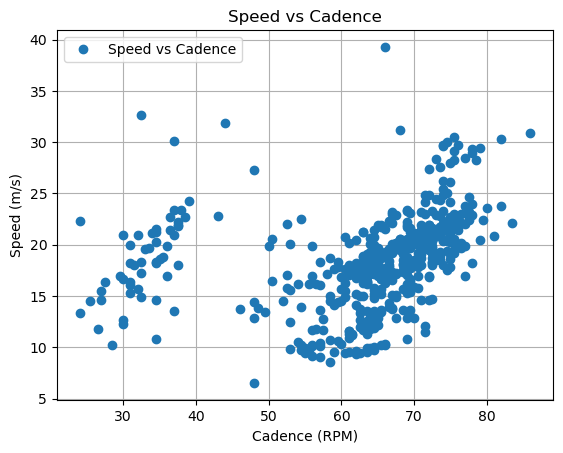

In [208]:
plt.plot(f_cad1,f_speed,marker='o',linestyle='',label='Speed vs Cadence')
plt.xlabel('Cadence (RPM)')
plt.ylabel('Speed (m/s)')
plt.title('Speed vs Cadence')
plt.grid(True)
plt.legend()
plt.show()

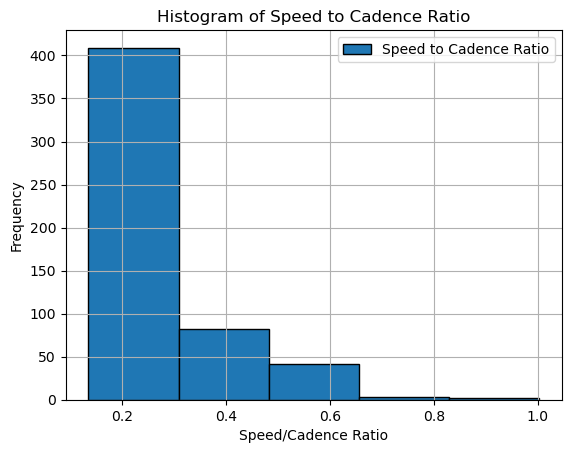

In [209]:
plt.hist(f_speed/f_cad1, bins=5, edgecolor='black',label='Speed to Cadence Ratio')
plt.title('Histogram of Speed to Cadence Ratio')
plt.xlabel('Speed/Cadence Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

In [210]:
#Based on the Ratio that comes from the histogram mainly being lower. 
#This can be translated to a consistant period of time where you pedaled more and covered a small amount of distace (didn't go ver fast).
#Meaning that you used a small front gear (small amount of teeth like 12?) and a large back gear (large amount of teeth like 34?)

In [211]:
hr1 = []
for i in range(len(cad) - 1):
    r = (hr[i + 1] + hr[i]) / 2
    hr1.append(r)
hr1 = np.array(hr1)
len(hr1)

663

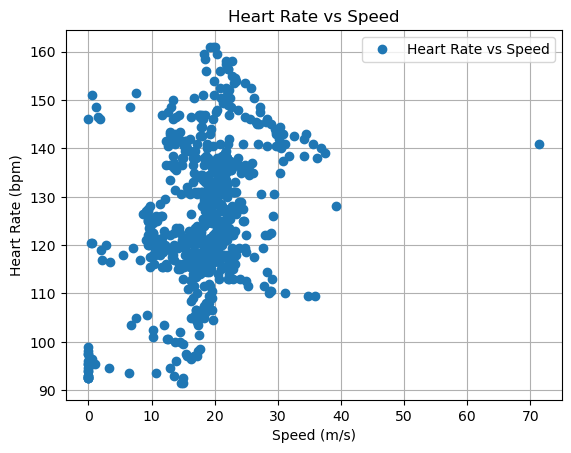

In [212]:
#Looks like that at lower speeds you have a higher heartrate
plt.plot(speed, hr1, marker='o', linestyle='', label='Heart Rate vs Speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate vs Speed')
plt.grid(True)
plt.legend()
plt.show()

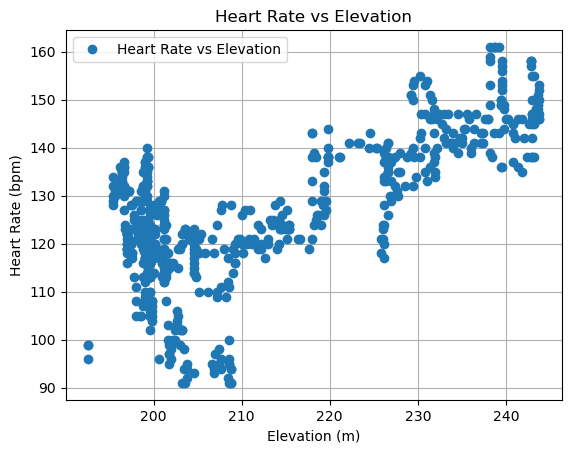

In [213]:
#At higher points of elevation, you have a higher heart rate
plt.plot(ele, hr, marker='o', linestyle='', label='Heart Rate vs Elevation')
plt.xlabel('Elevation (m)')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate vs Elevation')
plt.grid(True)
plt.legend()
plt.show()

In [214]:
import csv

data = zip(hour,minute,second, lat, long, ele, hr, cad, speed)
csv_file = 'ride_data.csv'
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Hour','Minutes','Seconds', 'Latitude', 'Longitude', 'Elevation (m)', 'Heart Rate (bpm)', 'Cadence (RPM)', 'Speed (m/s)'])
    writer.writerows(data)